In [1]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.1 MB/s eta 0:00:00


In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import matplotlib.ticker as ticker
import shap

########################################
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor'  : '#212946',
    'axes.facecolor'    : '#212946',
    'savefig.facecolor' : '#212946',
    'axes.grid'         : True,
    'axes.grid.which'   : 'both',
    'axes.spines.left'  : False,
    'axes.spines.right' : False,
    'axes.spines.top'   : False,
    'axes.spines.bottom': False,
    'grid.color'        : '#2A3459',
    'grid.linewidth'    : '1',
    'text.color'        : '0.9',
    'axes.labelcolor'   : '0.9',
    'xtick.color'       : '0.9',
    'ytick.color'       : '0.9',
    'font.size'         : 12
}
plt.rcParams.update(dark_style)

import plotly.express as px
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,jaccard_score,log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [3]:
url='https://raw.githubusercontent.com/Saul-Ochoa/Python-MachineLearning/main/Machine%20learning%20projects/Data/Credit%20Score%20Classification%20Dataset.csv'

In [4]:
df=pd.read_csv(url,sep=',')
df=pd.DataFrame(data=df)
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [5]:
df.shape

(164, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [7]:
df.select_dtypes(include='object').nunique()

Gender            2
Education         5
Marital Status    2
Home Ownership    2
Credit Score      3
dtype: int64

In [8]:
df.columns

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

# **Eplory Data Analytics**

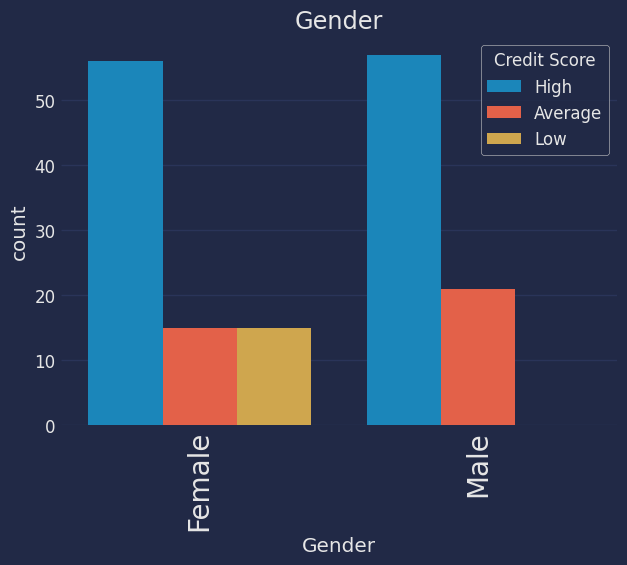

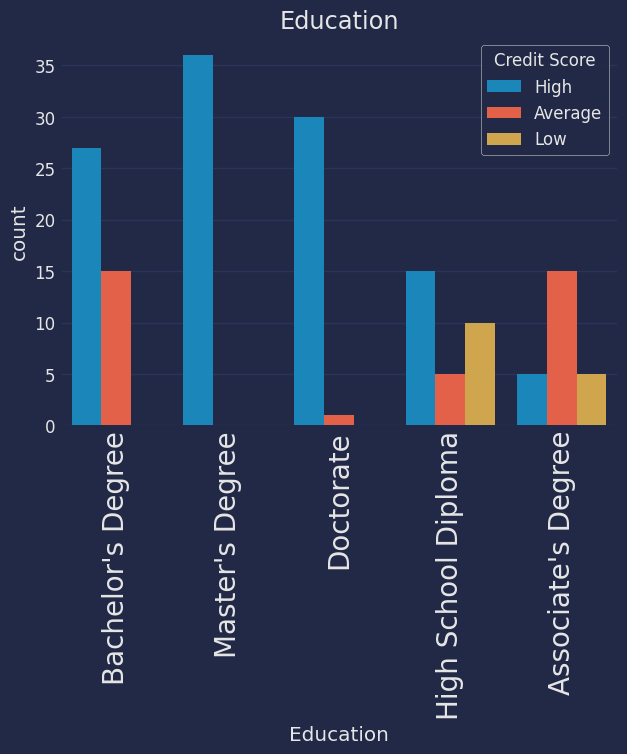

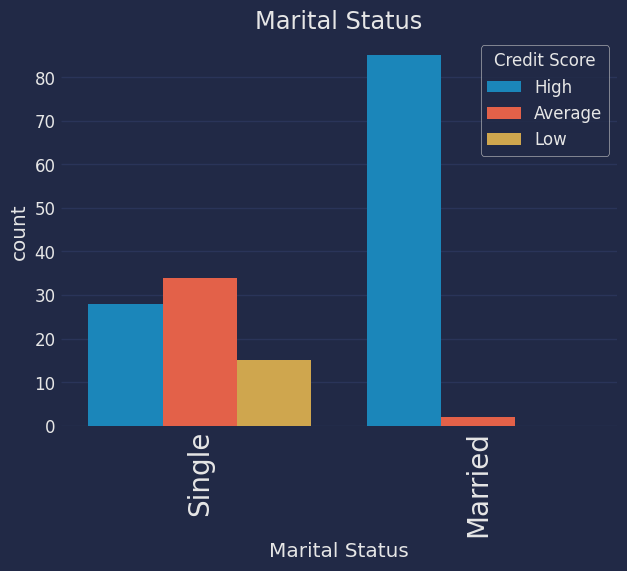

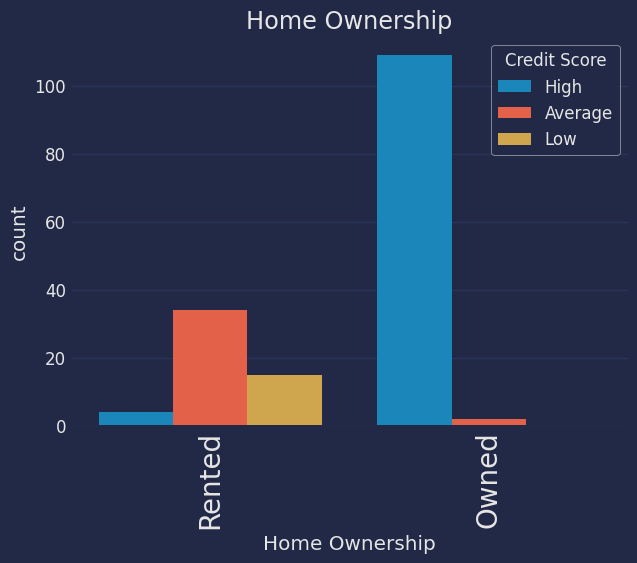

In [9]:
#variables categoricas
cat_vars=['Gender','Education', 'Marital Status','Home Ownership']
for i in cat_vars:
  sns.countplot(x=i,hue='Credit Score',data=df)
  plt.title(i)
  plt.xticks(rotation=90,fontsize=20)
  plt.show()
  print('')

In [10]:
df['Credit Score'].value_counts()

High       113
Average     36
Low         15
Name: Credit Score, dtype: int64

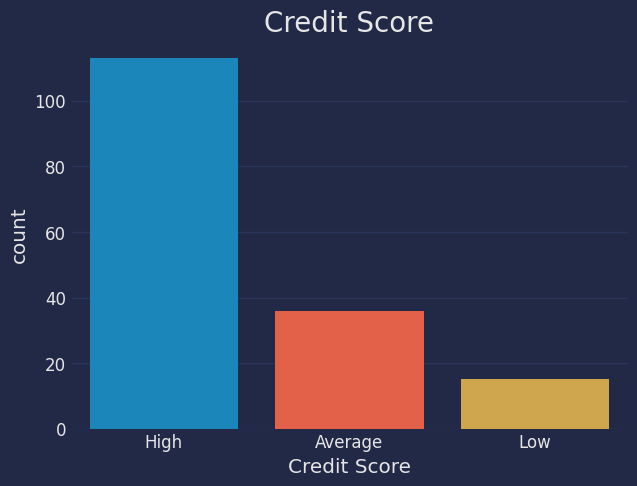

In [11]:
sns.countplot(data=df,x='Credit Score')
plt.title('Credit Score',fontsize=20)
plt.show()

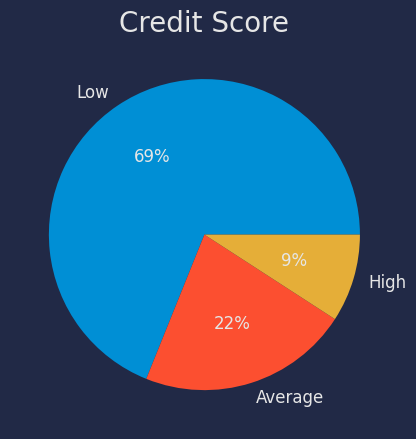

In [12]:
class_counts=df['Credit Score'].value_counts()
labels = ["Low", "Average", "High"]
values=class_counts.values
#pie
plt.pie(values,labels=labels,autopct="%1.0f%%")
plt.title("Credit Score",fontsize=20)
plt.show()

In [13]:
#Data numerica
num_vars=['Age','Income']

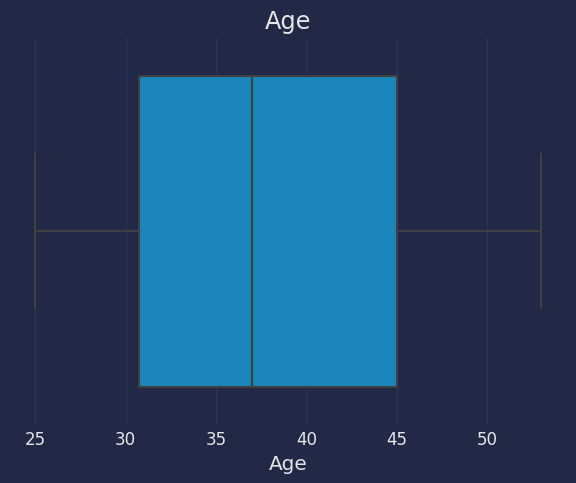

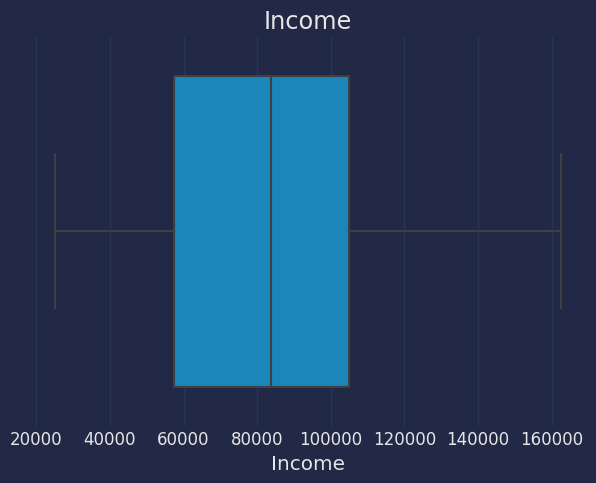

In [14]:
for i in num_vars:
  sns.boxplot(data=df,x=i)
  plt.title(i)
  plt.show()
  print('')

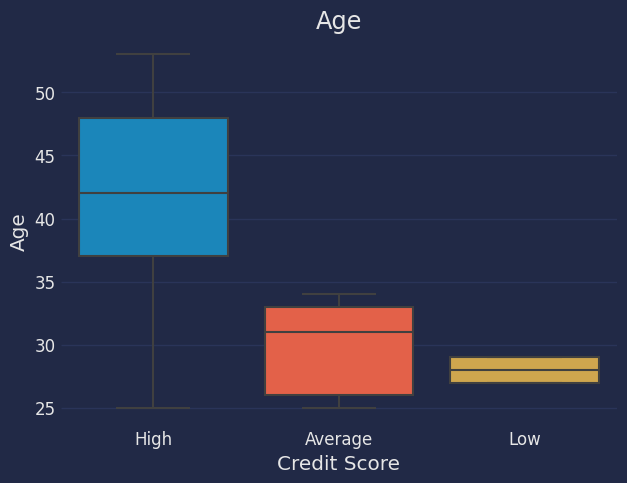

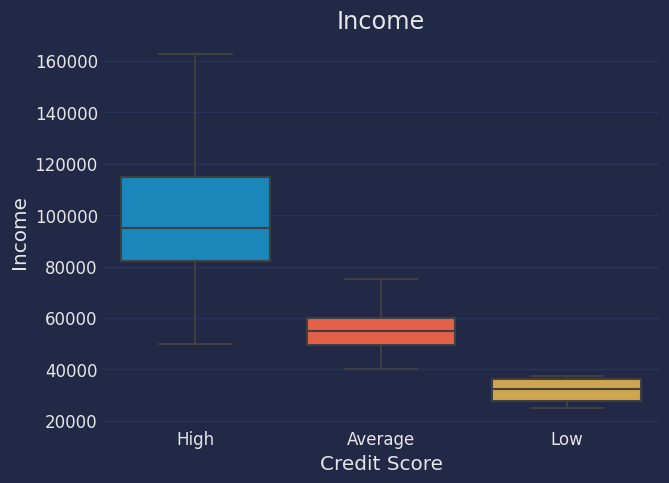

In [15]:
for i in num_vars:
  sns.boxplot(y=i,x='Credit Score',data=df)
  plt.title(i)
  plt.show()
  print('')

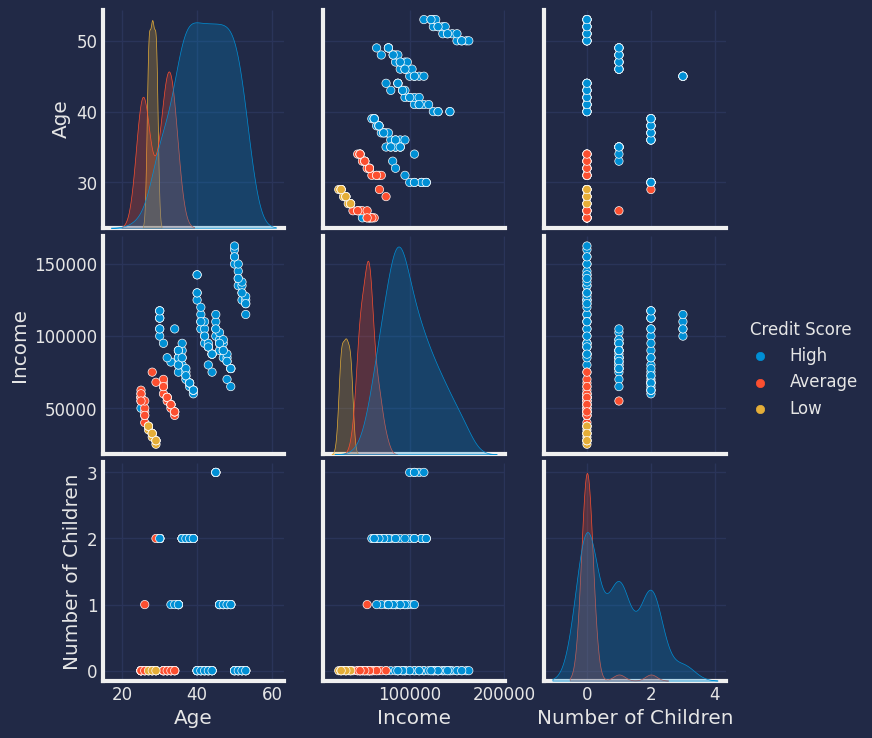

In [16]:
sns.pairplot(data=df,hue='Credit Score')
plt.show()

# **Data Preprocessing**

In [17]:
df.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

<Axes: >

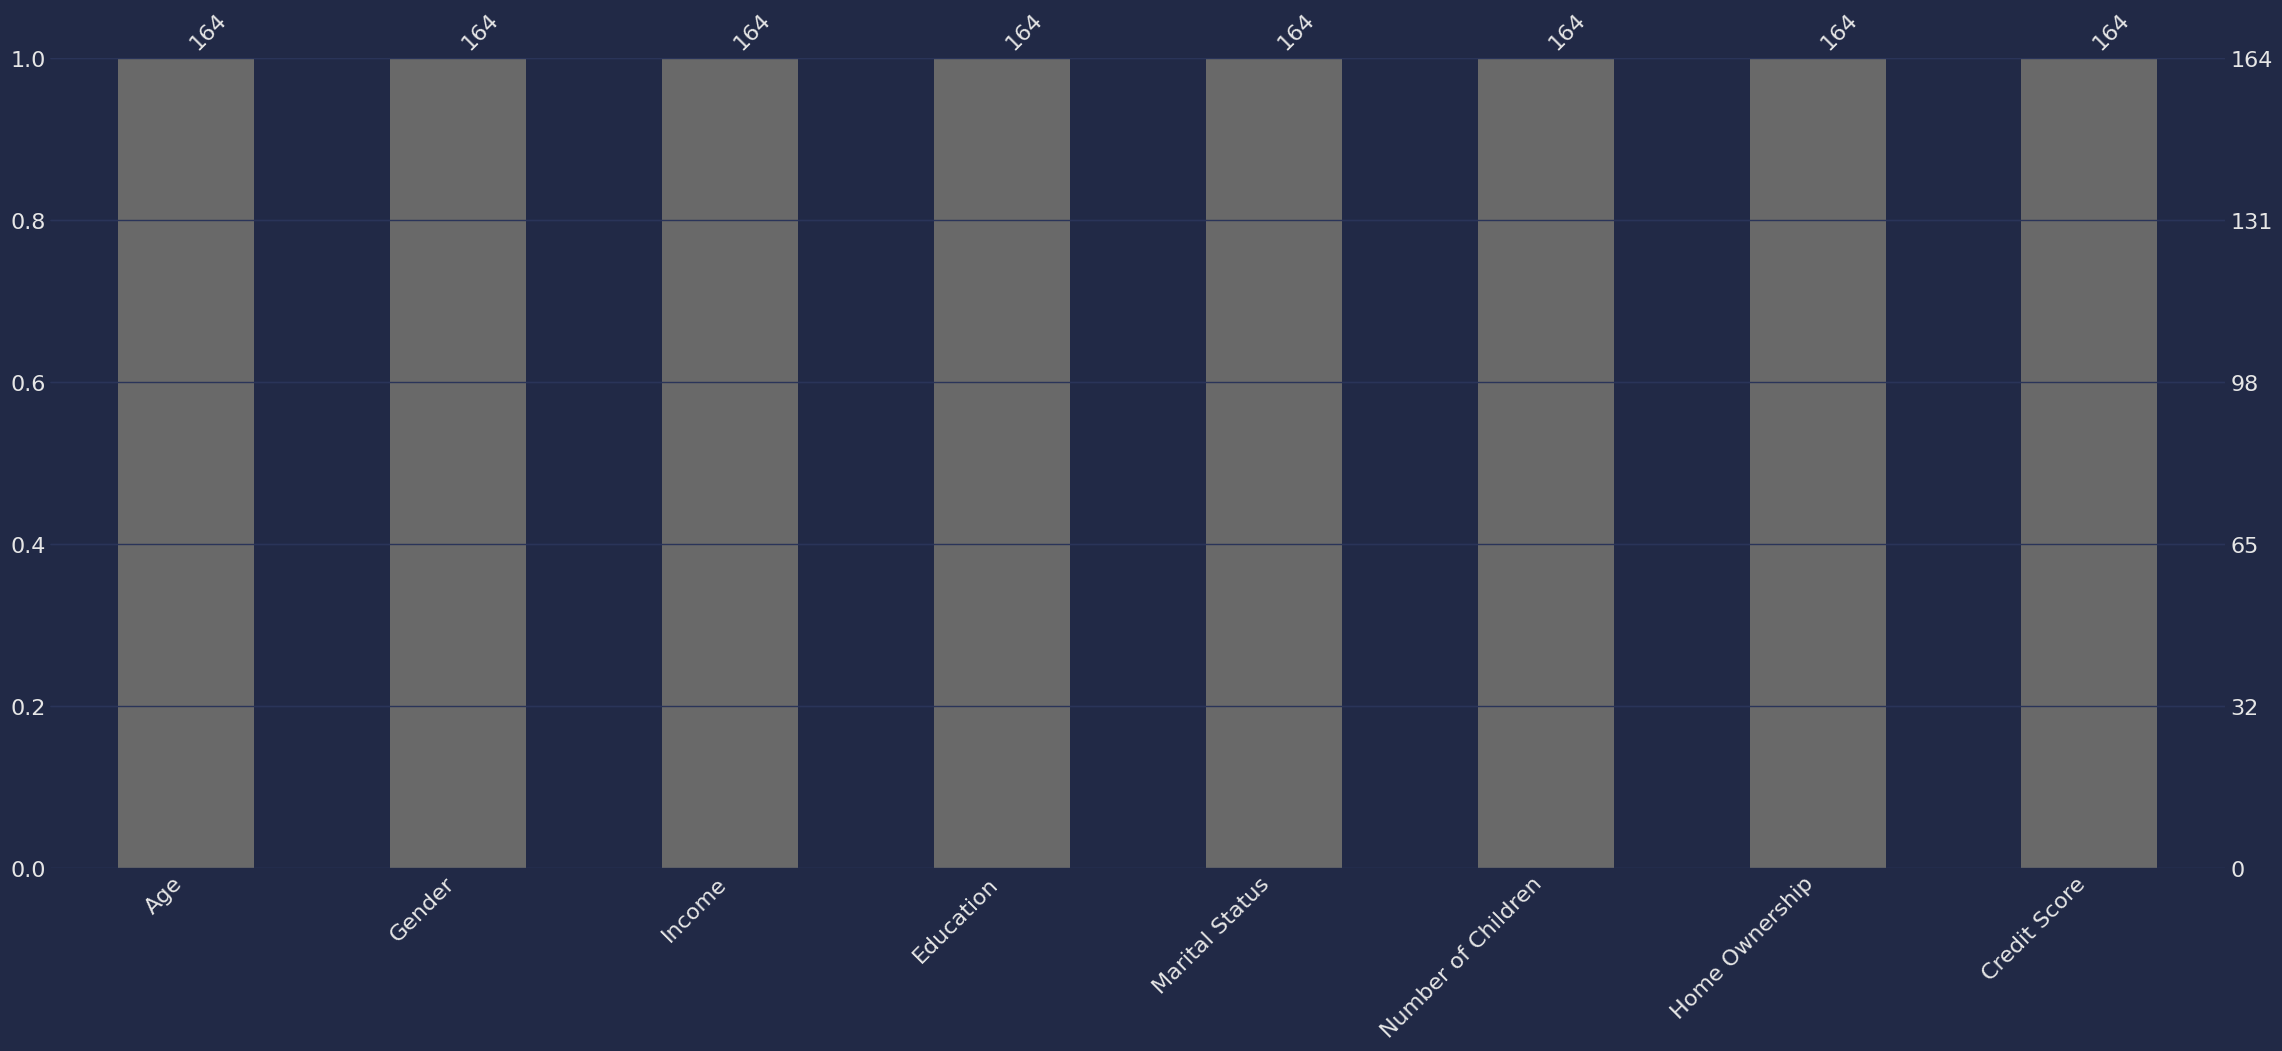

In [18]:
import missingno as msno
msno.bar(df)

In [19]:
check_missing=df.isnull().sum()*100/df.shape[0]
check_missing[check_missing>0].sort_values(ascending=False)

Series([], dtype: float64)

# **Label Encoding**

In [20]:
for col in df.select_dtypes(include=['object']).columns:
  print(f"{col}: {df[col].unique()}")

Gender: ['Female' 'Male']
Education: ["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]
Marital Status: ['Single' 'Married']
Home Ownership: ['Rented' 'Owned']
Credit Score: ['High' 'Average' 'Low']


In [21]:
from sklearn import preprocessing
for col in df.select_dtypes(include=['object']).columns:
  label_encoder=preprocessing.LabelEncoder()
  label_encoder.fit(df[col].unique())
  df[col]=label_encoder.transform(df[col])
  print(f"{col}: {df[col].unique()}")

Gender: [0 1]
Education: [1 4 2 3 0]
Marital Status: [1 0]
Home Ownership: [1 0]
Credit Score: [1 0 2]


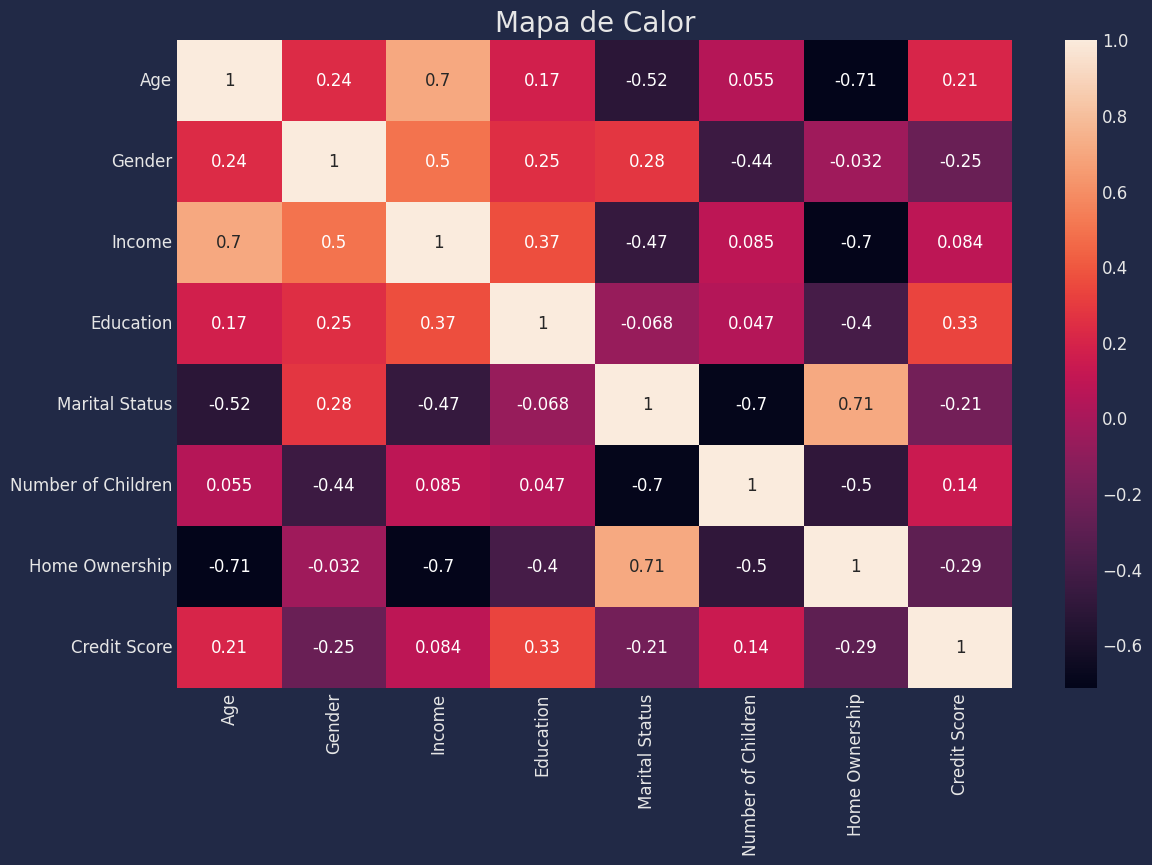

In [22]:
#Mapa de calor
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),fmt='.2g',annot=True)
plt.title("Mapa de Calor", fontsize=20)
plt.show()

In [23]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,0,50000,1,1,0,1,1
1,30,1,100000,4,0,2,0,1
2,35,0,75000,2,0,1,0,1
3,40,1,125000,3,1,0,0,1
4,45,0,100000,1,0,3,0,1


In [24]:
df['Credit Score'].value_counts()

1    113
0     36
2     15
Name: Credit Score, dtype: int64

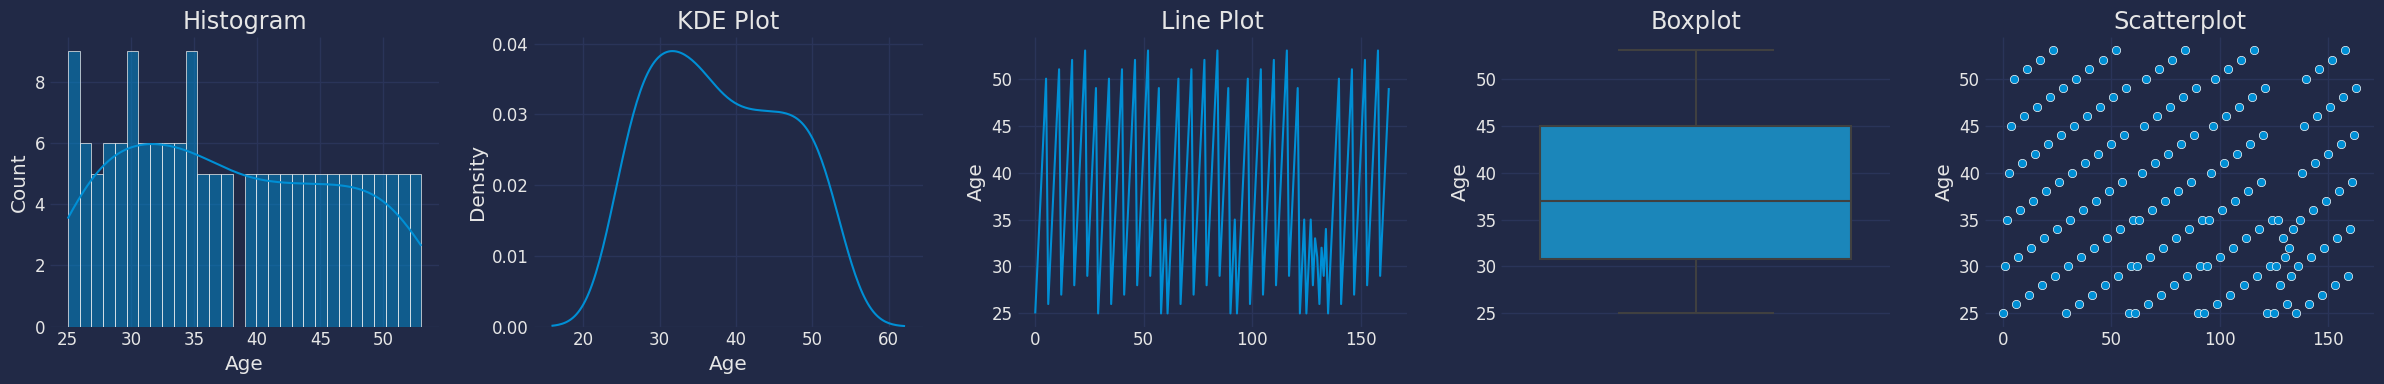

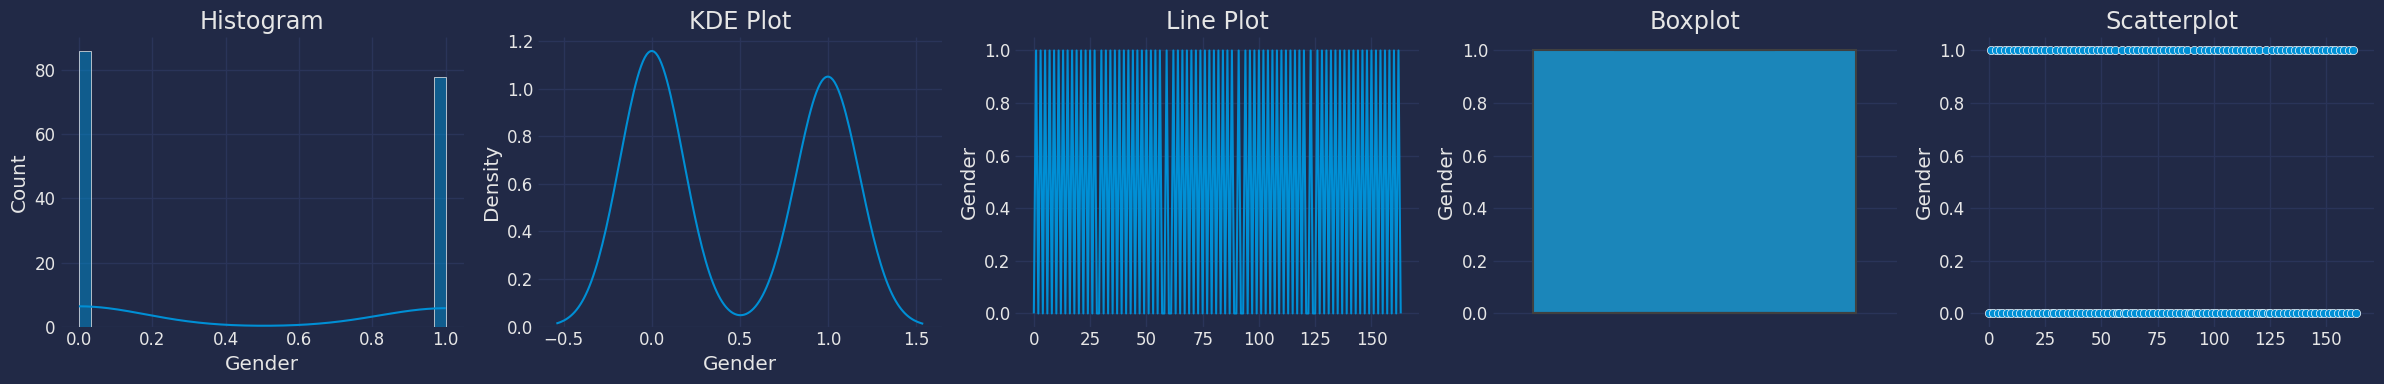

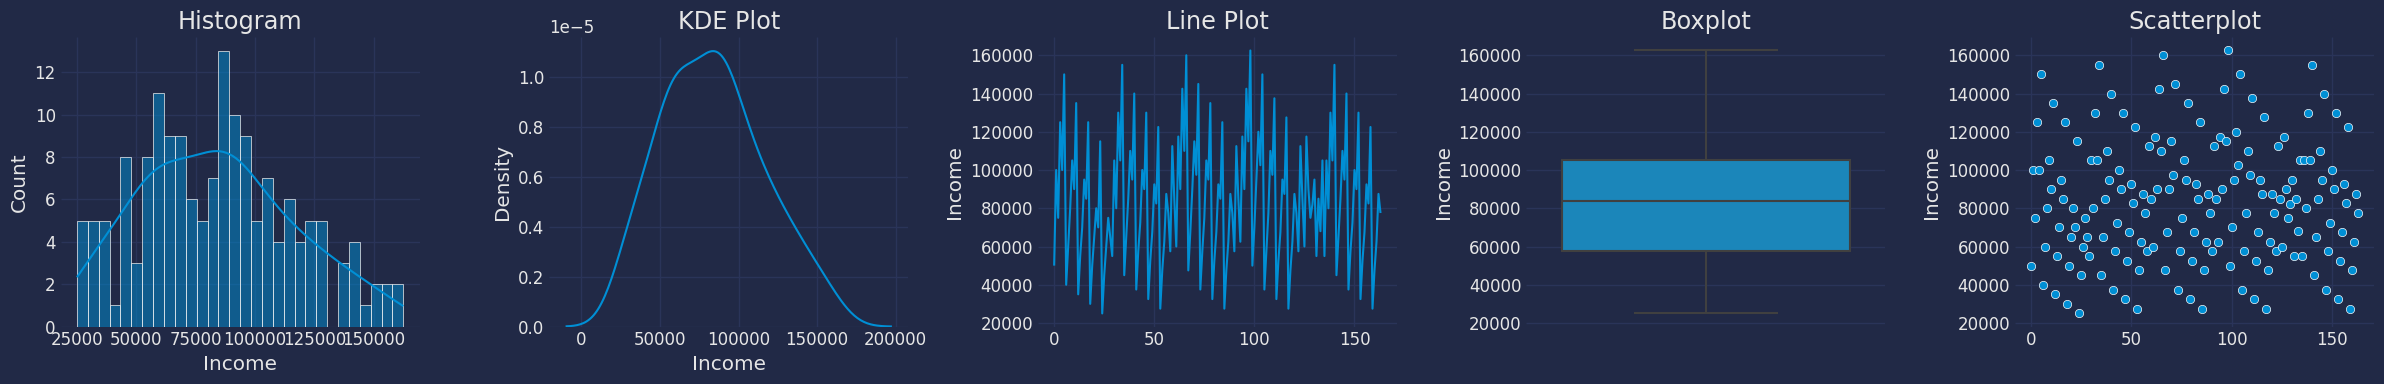

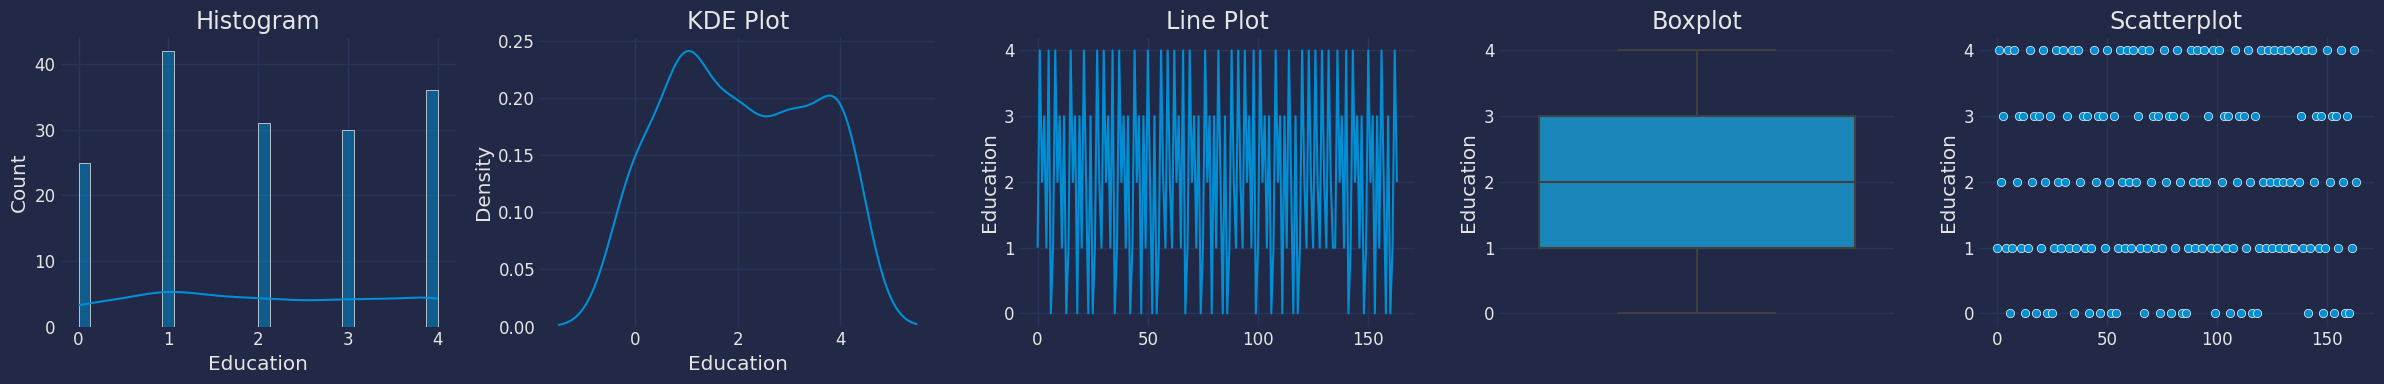

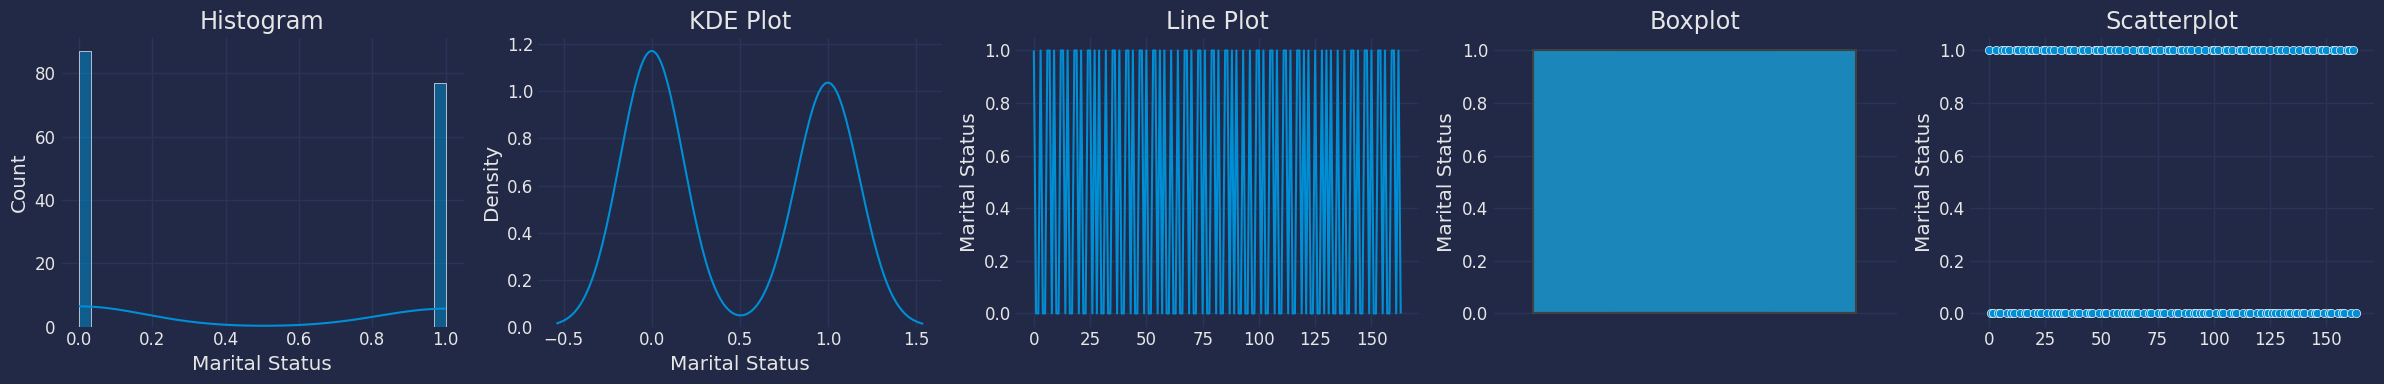

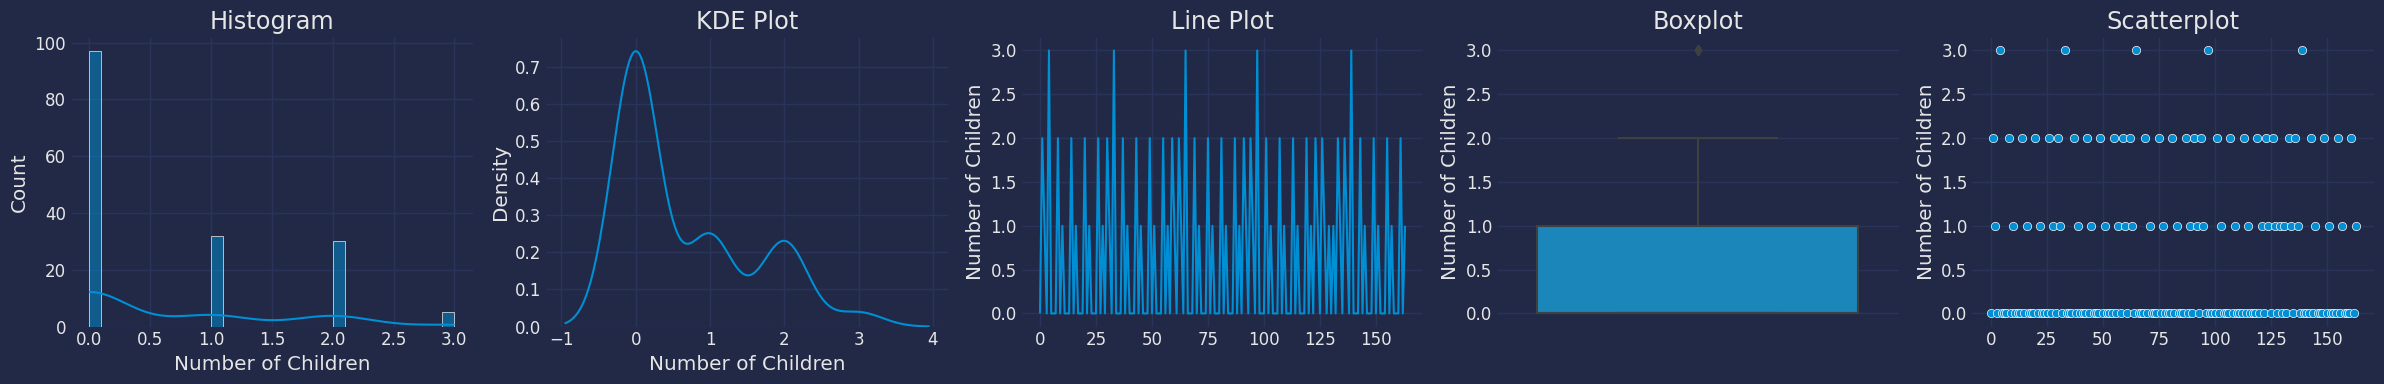

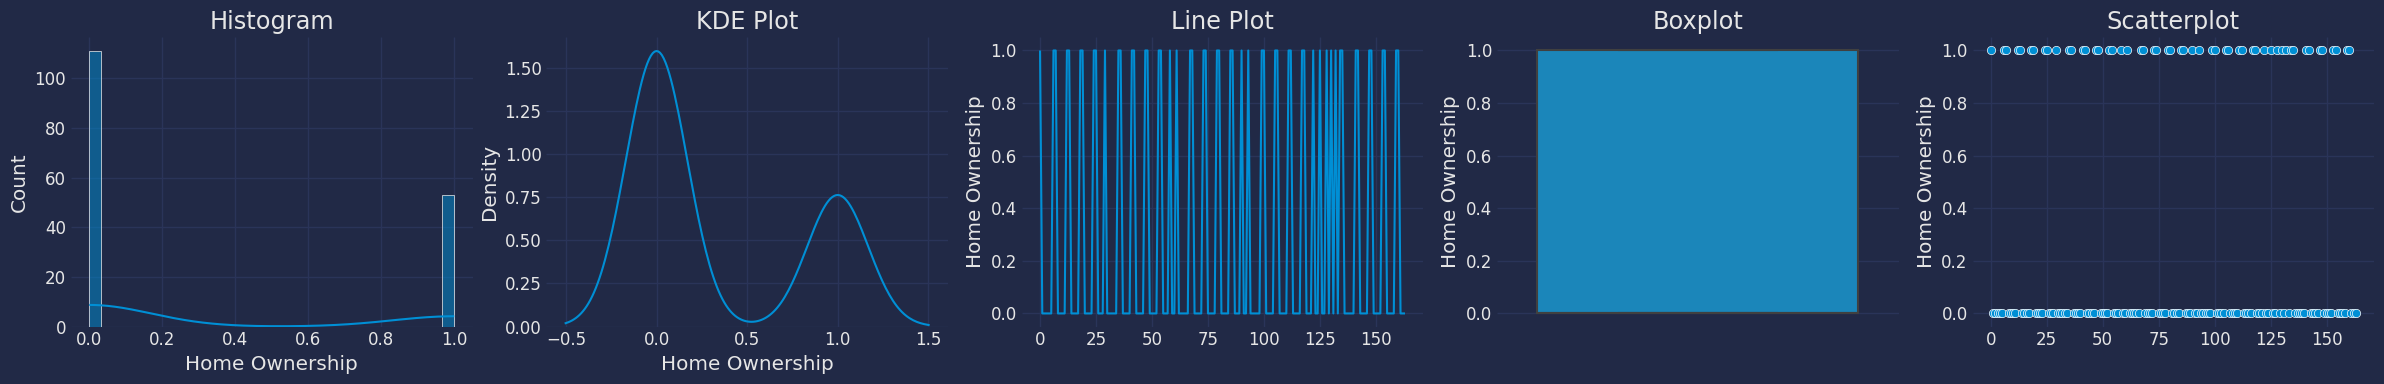

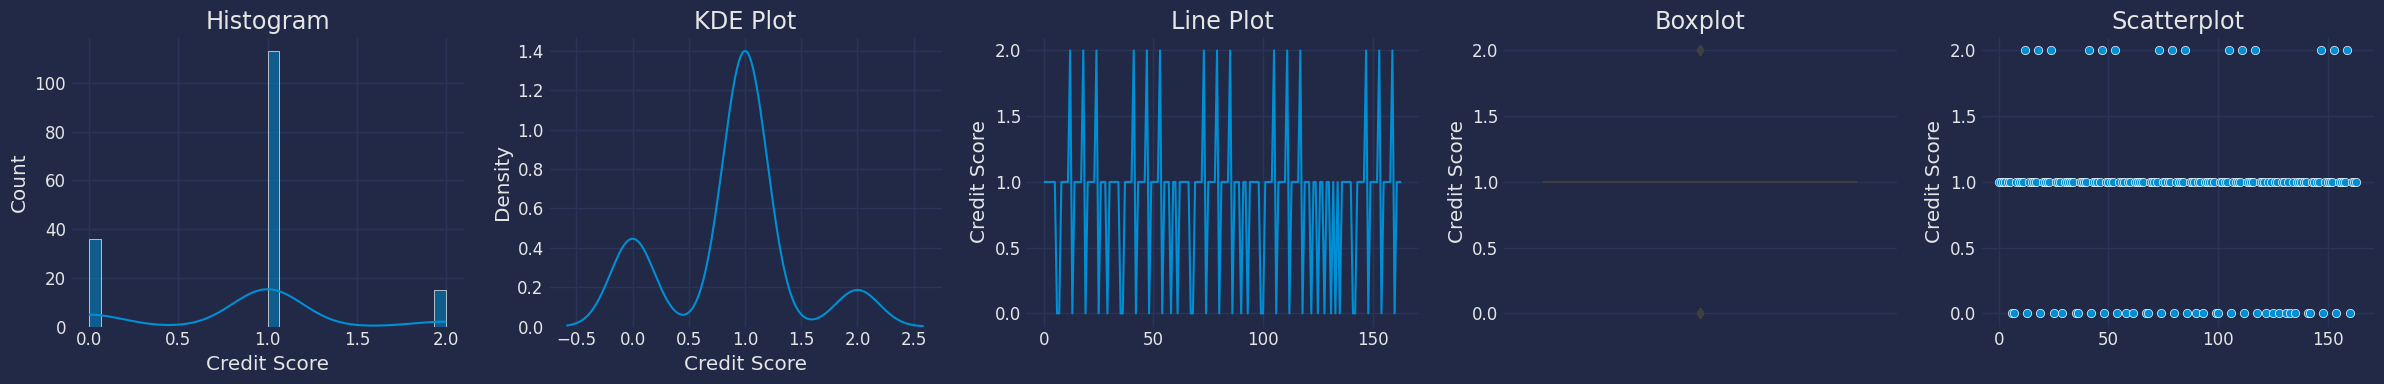

In [25]:
def plots(df, variable):
  if df[variable].dtype != object:
    # define figure size
    fig, ax = plt.subplots(1, 5, figsize=(24, 4))
    
    # histogram
    sns.histplot(df[variable], bins=30, kde=True, ax=ax[0])
    ax[0].set_title('Histogram')
    
    # KDE plot
    sns.kdeplot(df[variable], ax=ax[1])
    ax[1].set_title('KDE Plot')
    
    # Line plot
    sns.lineplot(df[variable], ax=ax[2])
    ax[2].set_title('Line Plot')
    
    # boxplot
    sns.boxplot(y=df[variable], ax=ax[3])
    ax[3].set_title('Boxplot')
    
    # scatterplot
    sns.scatterplot(x=df.index, y=df[variable], ax=ax[4])
    ax[4].set_title('Scatterplot')
    
    plt.tight_layout()
    plt.show()

for i in df.columns:
    plots(df ,i)

# Outlier No existe

# Train Test Split

In [26]:
X=df.drop(columns='Credit Score',axis=1)
y=df['Credit Score']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=100)

# Modelos de Prediccion

In [28]:
import matplotlib.pyplot as plt

# Establecer el estilo y las configuraciones de colores
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor'  : '#F0F0F0',
    'axes.facecolor'    : '#F0F0F0',
    'savefig.facecolor' : '#F0F0F0',
    'axes.grid'         : True,
    'axes.grid.which'   : 'both',
    'axes.spines.left'  : False,
    'axes.spines.right' : False,
    'axes.spines.top'   : False,
    'axes.spines.bottom': False,
    'grid.color'        : '#DADADA',
    'grid.linewidth'    : '1',
    'text.color'        : '#212946',
    'axes.labelcolor'   : '#212946',
    'xtick.color'       : '#212946',
    'ytick.color'       : '#212946',
    'font.size'         : 12
}
plt.rcParams.update(dark_style)
def calculate_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred,average='micro')
    prec = precision_score(y_true, y_pred,average='micro')
    rec = recall_score(y_true, y_pred,average='micro')
    jacc=jaccard_score(y_true,y_pred,average='micro')
    return {'Accuracy': acc, 'F1 Score': f1, 'Precision': prec, 'Recall': rec,'Jaccard':jacc}

## **Decision Tree**

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree=DecisionTreeClassifier(class_weight='balanced')
params={
    'max_depth':[3,4,5,6,7,9,10,15,20],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2,3,4],
    'random_state':[0,25,50,100,250],
    'criterion':['gini', 'entropy', 'log_loss']
}
grid_search=GridSearchCV(dtree,params,cv=5)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [30]:
dtree=DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=0,criterion='gini')
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [31]:
y_pred=dtree.predict(X_test)
print("Accuracy Score :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy Score : 95.12 %


In [32]:
calculate_metrics(y_test,y_pred)

{'Accuracy': 0.9512195121951219,
 'F1 Score': 0.9512195121951219,
 'Precision': 0.9512195121951219,
 'Recall': 0.9512195121951219,
 'Jaccard': 0.9069767441860465}

In [33]:
imp_df=pd.DataFrame({
    "Feature Name":X_train.columns,
    "Importance":dtree.feature_importances_
})

fi=imp_df.sort_values(by='Importance',ascending=False)
fi.head(10)

,Feature Name,Importance
6,Home Ownership,0.670902
2,Income,0.329098
0,Age,0.000000
1,Gender,0.000000
3,Education,0.000000
4,Marital Status,0.000000
5,Number of Children,0.000000


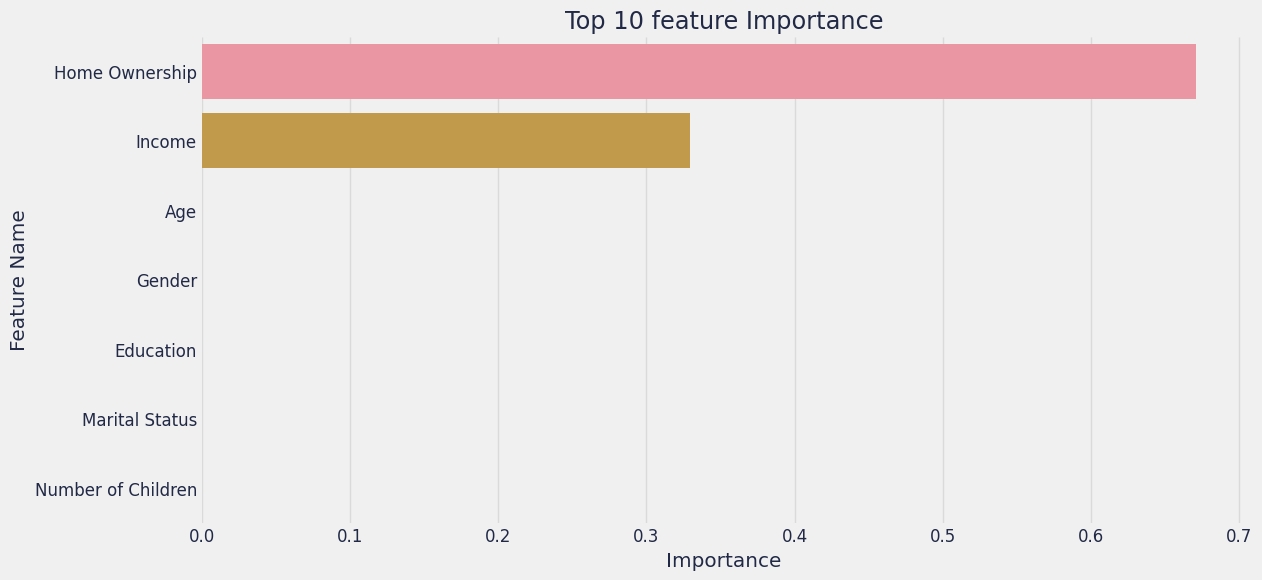

In [34]:
fi_2=fi.head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=fi_2,x='Importance',y='Feature Name')
plt.title('Top 10 feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.show()

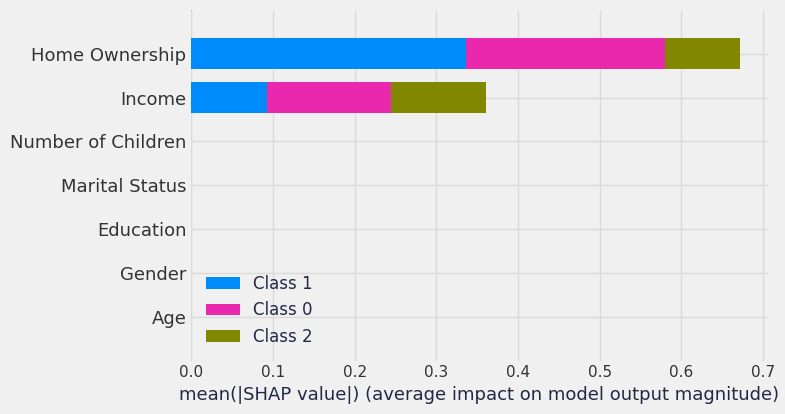

In [35]:
def modelo(model):
  explainer=shap.TreeExplainer(model)
  shap_values=explainer.shap_values(X_test)
  shap.summary_plot(shap_values,X_test)

modelo(dtree)

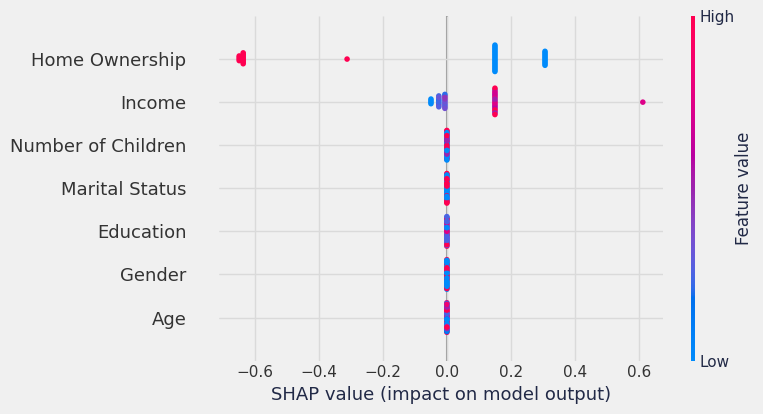

In [36]:
def modelo_shap(model):
  explainer=shap.TreeExplainer(model)
  shap_values=explainer.shap_values(X_test)
  shap.summary_plot(shap_values[1],X_test.values,feature_names=X_test.columns)
modelo_shap(dtree)

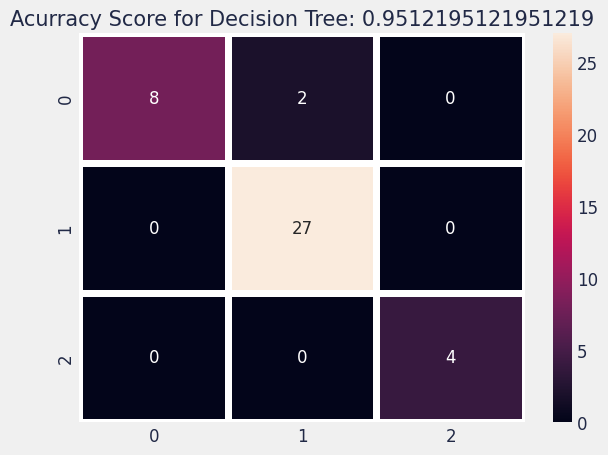

In [37]:
def matrix(model):
  from sklearn.metrics import confusion_matrix
  cm=confusion_matrix(y_test,y_pred)
  sns.heatmap(data=cm,linewidths=5,annot=True)
  all_sample_title='Acurracy Score for Decision Tree: {0}'.format(model.score(X_test,y_test))
  plt.title(all_sample_title,size=15)
  plt.show()

matrix(dtree)

## Ramdon Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(class_weight='balanced')
param_grid={
    'n_estimators':[50,100,200],
    'max_depth':[None,5,10],
    'max_features':['sqrt','log2',None],
    'criterion':['gini', 'entropy', 'log_loss'],
    'random_state':[0,25,50,100,250],
    'bootstrap':[True, False]
}
grid_search=GridSearchCV(rfc,param_grid,cv=5)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)
     

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 50, 'random_state': 0}


In [39]:
rfc=RandomForestClassifier(random_state=0,max_features='sqrt',n_estimators=50,criterion='gini',max_depth=5,bootstrap=True)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=0)

In [40]:
y_pred=rfc.predict(X_test)
print("Accuracy Score :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy Score : 95.12 %


In [41]:
calculate_metrics(y_test,y_pred)

{'Accuracy': 0.9512195121951219,
 'F1 Score': 0.9512195121951219,
 'Precision': 0.9512195121951219,
 'Recall': 0.9512195121951219,
 'Jaccard': 0.9069767441860465}

In [85]:
imp_df=pd.DataFrame({
    "Feature Name":X_train.columns,
    "Importance":rfc.feature_importances_
})

fi=imp_df.sort_values(by='Importance',ascending=False)
fi.head(10)

,Feature Name,Importance
2,Income,0.351400
6,Home Ownership,0.278971
0,Age,0.187356
3,Education,0.089516
4,Marital Status,0.039659
1,Gender,0.038740
5,Number of Children,0.014358


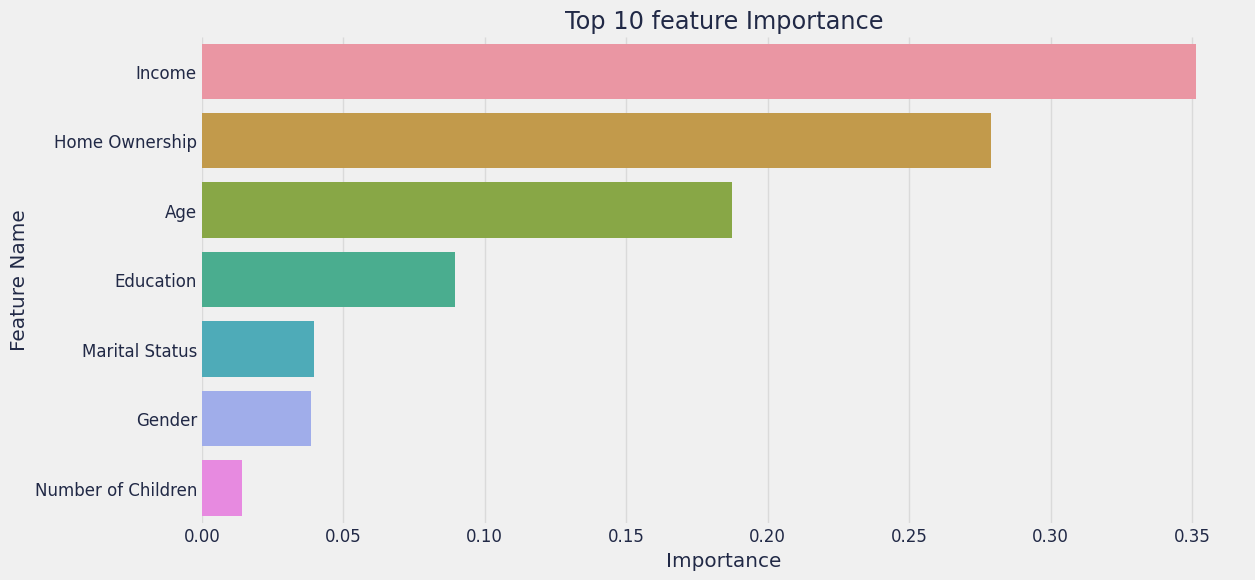

In [86]:
fi_2=fi.head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=fi_2,x='Importance',y='Feature Name')
plt.title('Top 10 feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.show()

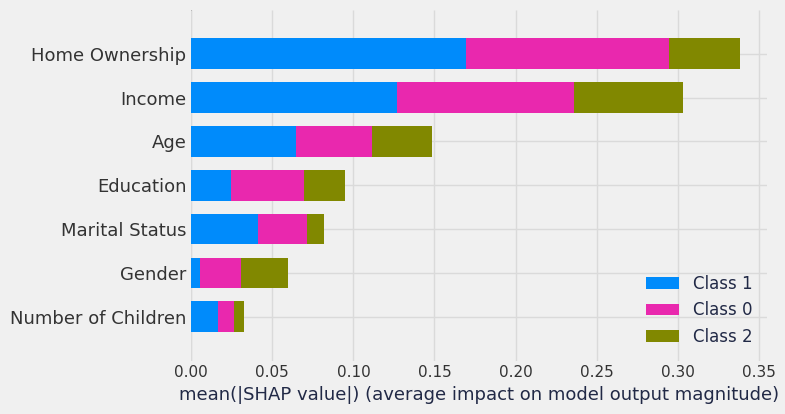

In [43]:
modelo(rfc)

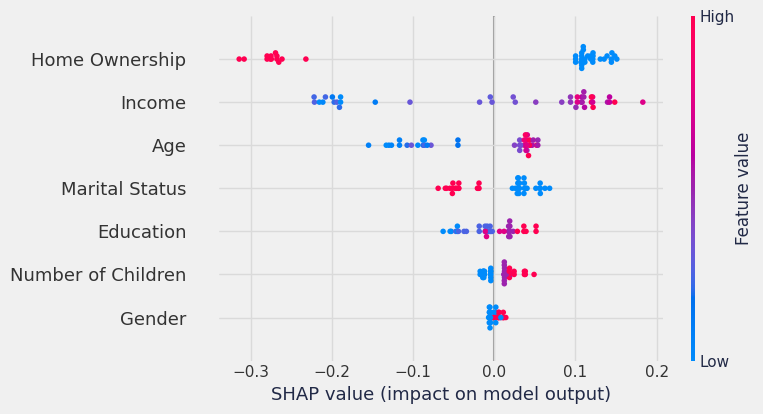

In [44]:
modelo_shap(rfc)

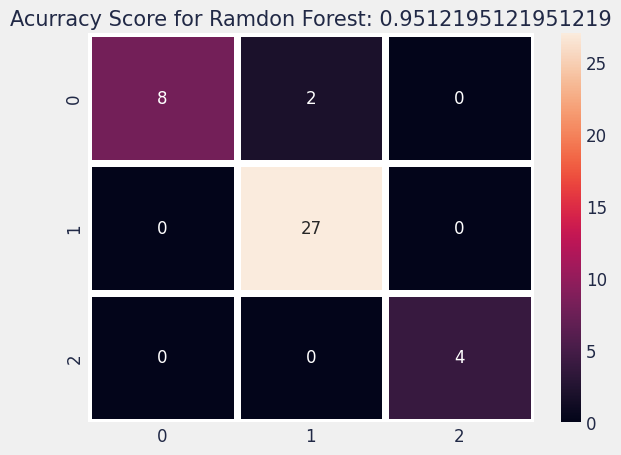

In [45]:
def matrix(model):
  from sklearn.metrics import confusion_matrix
  cm=confusion_matrix(y_test,y_pred)
  sns.heatmap(data=cm,linewidths=5,annot=True)
  all_sample_title='Acurracy Score for Ramdon Forest: {0}'.format(model.score(X_test,y_test))
  plt.title(all_sample_title,size=15)
  plt.show()

matrix(rfc)

## AdaBoostClassifier

In [46]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
adb=AdaBoostClassifier()
param_grid={
    'n_estimators':[50,100,200],
    'algorithm':['SAMME','SAMME.R'],
    'n_estimators':[50,100,200],
    'random_state':[0,25,50,100,250],
    'learning_rate':[0.001, 0.01, 0.1, 1, 10]  
}
grid_search = GridSearchCV(adb, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [47]:
print(grid_search.best_params_)

{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 50, 'random_state': 0}


In [48]:
adb=AdaBoostClassifier(random_state=0,algorithm='SAMME',learning_rate=0.1,n_estimators=50)
adb.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, random_state=0)

In [49]:
y_pred=adb.predict(X_test)
print("Accuracy Score :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy Score : 92.68 %


In [50]:
calculate_metrics(y_test,y_pred)

{'Accuracy': 0.926829268292683,
 'F1 Score': 0.926829268292683,
 'Precision': 0.926829268292683,
 'Recall': 0.926829268292683,
 'Jaccard': 0.8636363636363636}

In [51]:
imp_df=pd.DataFrame({
    "Feature Name":X_train.columns,
    "Importance":adb.feature_importances_
})

fi=imp_df.sort_values(by='Importance',ascending=False)
fi.head(10)

,Feature Name,Importance
2,Income,0.695731
6,Home Ownership,0.304269
0,Age,0.000000
1,Gender,0.000000
3,Education,0.000000
4,Marital Status,0.000000
5,Number of Children,0.000000


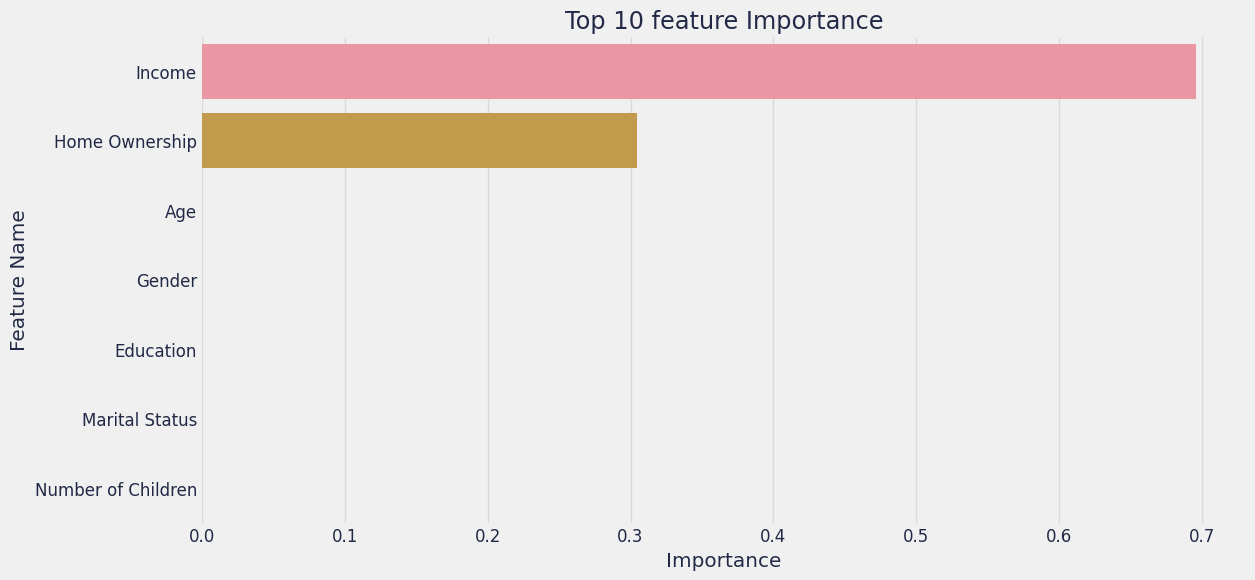

In [52]:
fi_2=fi.head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=fi_2,x='Importance',y='Feature Name')
plt.title('Top 10 feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.show()

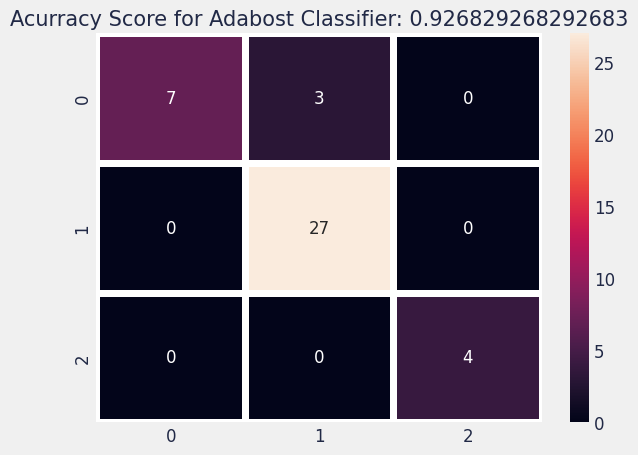

In [53]:
def matrix(model):
  from sklearn.metrics import confusion_matrix
  cm=confusion_matrix(y_test,y_pred)
  sns.heatmap(data=cm,linewidths=5,annot=True)
  all_sample_title='Acurracy Score for Adabost Classifier: {0}'.format(model.score(X_test,y_test))
  plt.title(all_sample_title,size=15)
  plt.show()

matrix(adb)

## **GradientBoostingClassifier**

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
xgb_classifier = GradientBoostingClassifier()
param_grid={
    'n_estimators':[50,100,200],
    'criterion':['friedman_mse'],
    'random_state':[0,25,50,100,250],
    'max_features':['sqrt','log2',None],
    'learning_rate':[0.001, 0.01, 0.1, 1, 10],
    'loss':['log_loss','deviance', 'exponential']
}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [79]:
print(grid_search.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 0.01, 'loss': 'log_loss', 'max_features': 'sqrt', 'n_estimators': 50, 'random_state': 50}


In [80]:
xgb_classifier = GradientBoostingClassifier(random_state=50,criterion='friedman_mse',learning_rate=0.01,n_estimators=50,loss='log_loss',max_features='sqrt')
xgb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_features='sqrt',
                           n_estimators=50, random_state=50)

In [81]:
y_pred=xgb_classifier.predict(X_test)
print("Accuracy Score :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy Score : 92.68 %


In [82]:
calculate_metrics(y_test,y_pred)

{'Accuracy': 0.926829268292683,
 'F1 Score': 0.926829268292683,
 'Precision': 0.926829268292683,
 'Recall': 0.926829268292683,
 'Jaccard': 0.8636363636363636}

In [83]:
imp_df=pd.DataFrame({
    "Feature Name":X_train.columns,
    "Importance":xgb_classifier.feature_importances_
})

fi=imp_df.sort_values(by='Importance',ascending=False)
fi.head(10)

,Feature Name,Importance
2,Income,0.302929
6,Home Ownership,0.260364
0,Age,0.225052
3,Education,0.075671
4,Marital Status,0.075145
1,Gender,0.032197
5,Number of Children,0.028642


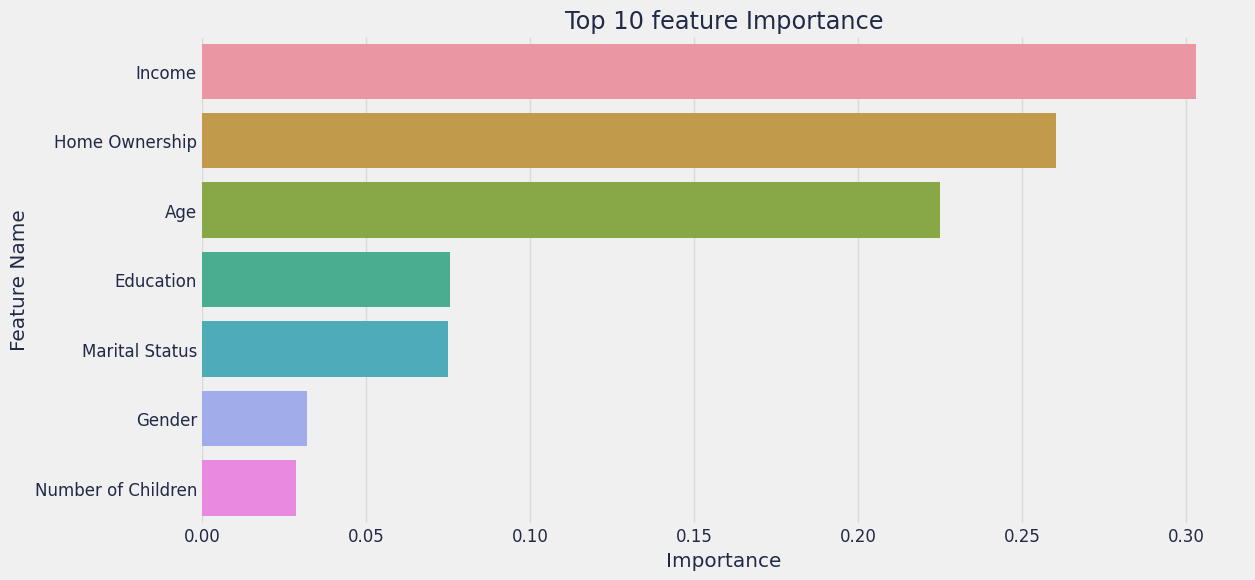

In [84]:
fi_2=fi.head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=fi_2,x='Importance',y='Feature Name')
plt.title('Top 10 feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.show()

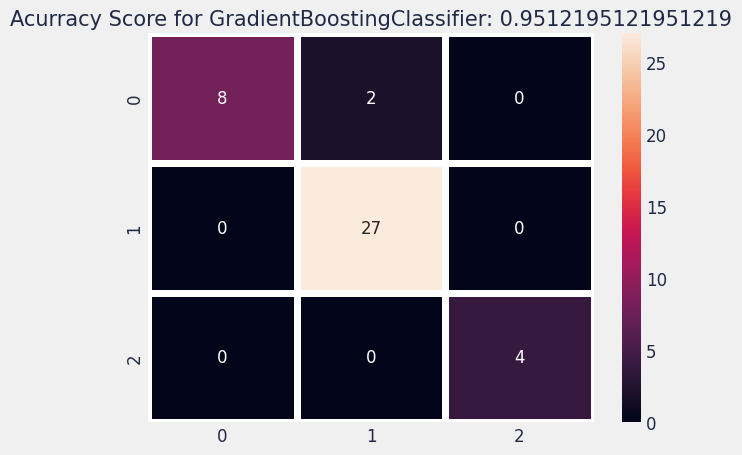

In [77]:
def matrix(model):
  from sklearn.metrics import confusion_matrix
  cm=confusion_matrix(y_test,y_pred)
  sns.heatmap(data=cm,linewidths=5,annot=True)
  all_sample_title='Acurracy Score for GradientBoostingClassifier: {0}'.format(model.score(X_test,y_test))
  plt.title(all_sample_title,size=15)
  plt.show()

matrix(xgb_classifier)

## **KNeighborsClassifier**

In [116]:
from pycaret import classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param_grid={
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[10,20,30],
    'metric':['str','minkowski'],
    'metric_params':['dict',None],
    'n_jobs':[1,-1,None],
    'n_neighbors':[1,3,5,7,10],
    'weights':['uniform', 'distance']
}
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [97]:
print(grid_search.best_params_)

{'algorithm': 'auto', 'leaf_size': 10, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': 1, 'n_neighbors': 7, 'weights': 'uniform'}


In [98]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski', metric_params=None, n_jobs= 1, n_neighbors=5, weights='uniform')
knn.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=10, n_jobs=1)

In [99]:
y_pred=knn.predict(X_test)
print("Accuracy Score :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy Score : 95.12 %


In [100]:
calculate_metrics(y_test,y_pred)

{'Accuracy': 0.9512195121951219,
 'F1 Score': 0.9512195121951219,
 'Precision': 0.9512195121951219,
 'Recall': 0.9512195121951219,
 'Jaccard': 0.9069767441860465}

In [118]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.93      1.00      0.96        27
           2       1.00      1.00      1.00         4

    accuracy                           0.95        41
   macro avg       0.98      0.93      0.95        41
weighted avg       0.95      0.95      0.95        41



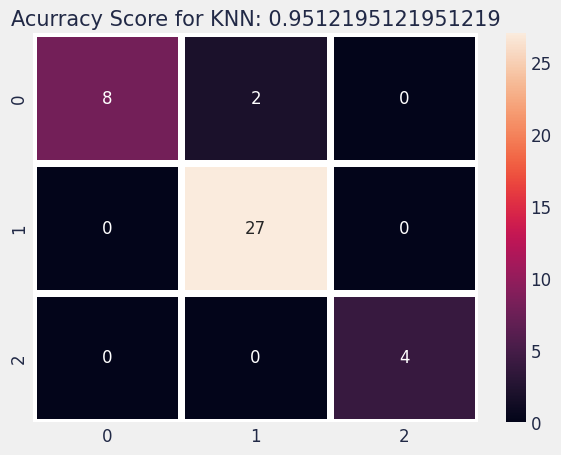

In [102]:
def matrix(model):
  from sklearn.metrics import confusion_matrix
  cm=confusion_matrix(y_test,y_pred)
  sns.heatmap(data=cm,linewidths=5,annot=True)
  all_sample_title='Acurracy Score for KNN: {0}'.format(model.score(X_test,y_test))
  plt.title(all_sample_title,size=15)
  plt.show()

matrix(knn)

**Validacion Cruzada**

In [124]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)
# Evaluate the ensemble model using cross-validation
scores = cross_val_score(knn, X_train, y_train, cv=cv)

In [125]:
print("Puntajes de rendimiento:", scores)
print("Exactitud promedio:", scores.mean())

Puntajes de rendimiento: [0.96       0.92       0.96       0.875      0.91666667]
Exactitud promedio: 0.9263333333333333


### **El mejor modelo se obtiene con el KNNClassifier y GradientBoostingClassifier**